<h1>🧽 Data Cleaning - Dataset B (0001-14220) 🧽</h1>

Perform data cleaning on a segment in Dataset B.

<h2>🗃 Import Libraries</h2>

In [1]:
#pip install geopandas matplotlib folium shapely

In [2]:
#pip install xlsxwriter

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import webbrowser

<h2>📤 Upload Dataset</h2>

In [4]:
B_Original_df = pd.read_csv("datasets\input\Dataset_BG.csv")

<h2>🔍 Inspect Dataset</h2>

<h3>Check Data Types</h3>

In [5]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14219 entries, 0 to 14218
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  14219 non-null  object 
 1   Categories      14186 non-null  object 
 2   Subcategory     5981 non-null   object 
 3   Company Name    14217 non-null  object 
 4   Address         14219 non-null  object 
 5   Latitude        14195 non-null  float64
 6   Longitude       14195 non-null  float64
 7   State           14218 non-null  object 
 8   Country         14219 non-null  object 
 9   Contact no.     7092 non-null   object 
 10  FAX             309 non-null    object 
 11  Website         2623 non-null   object 
 12  E-mail          1103 non-null   object 
 13  Capital $       7294 non-null   object 
 14  Employee        6024 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.6+ MB


<h3>Check For Null Values</h3>

In [6]:
B_Original_df.isnull().any()

Business Model    False
Categories         True
Subcategory        True
Company Name       True
Address           False
Latitude           True
Longitude          True
State              True
Country           False
Contact no.        True
FAX                True
Website            True
E-mail             True
Capital $          True
Employee           True
dtype: bool

<h3>Summarize Dataset</h3>

In [7]:
B_Original_df.describe()

,Latitude,Longitude
count,14195.000000,14195.000000
mean,50.692553,4.529144
std,2.063530,3.663873
min,-3.615000,-121.350154
25%,50.710539,3.648227
50%,50.916449,4.390559
75%,51.121726,5.064513
max,69.973318,39.468808


<h3>Check Random Samples</h3>

In [8]:
B_Original_df.sample(5)

,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact no.,FAX,Website,E-mail,Capital $,Employee
6098,OEM,Industrial Furnace,NaN,JETTE DECOR,"Keizer Karellaan 584,Sint-Agatha-Berchem,Belgi...",50.871657,4.288685,Sint-Agatha-Berchem,Belgium,#ERROR!,NaN,https://decordun.com/,NaN,NaN,NaN
4865,OEM,"Grinders, Crushes & Screen Machines",Engineering services,BRUGGEMAN ENGINEERING,"Kerkstraat 5,Oostrozebeke,Belgium,8780",50.921094,3.335517,Oostrozebeke,Belgium,#ERROR!,NaN,http://www.br-eng.be/,NaN,"64,000.00",1
5264,OEM,"Hydraullic Presses, Hydraullic & Pneumatic Com...",Hydraulic turbines,STORM 89,"Borsbeeksebrug 22,Antwerpen,Belgium,2600",51.200070,4.435667,Antwerpen,Belgium,NaN,NaN,https://www.stormcom.no/,mp@stormcom.no,"973,764.00",9
8107,OEM,Machinery Parts & Components,NaN,BETA DIAMOND TOOLS S.R.L.,"VIALE DELL'INDUSTRIA 60,PIACENZA,Italy,29122",45.047481,9.739456,PIACENZA,Italy,39 0523579662,NaN,NaN,NaN,NaN,NaN
13529,OEM,Welding & Cutting Machinery,NaN,V.D.H.-ELECTRO,"Liersesteenweg 61,Ranst,Belgium,2520",51.155767,4.587502,Ranst,Belgium,NaN,NaN,NaN,NaN,NaN,NaN


<h2>🧼 Clean Dataset</h2>

<h3>✂️ Remove Irrelevant Data</h3>

<h4>Confirm Shape</h4>

In [9]:
B_Original_df.shape

(14219, 15)

<h4>Peek Dataframe</h4>

In [10]:
B_Original_df.head(3)

,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact no.,FAX,Website,E-mail,Capital $,Employee
0,OEM,Agricultural Machinery,"Durable goods, nec",ener Sinan,"Breughelpark 1, Internal Mail Reference 34,Zel...",50.884504,4.271891,Zellik,Belgium,32 497255932,NaN,NaN,NaN,"141,353.00",1
1,OEM,Agricultural Machinery,"Iron work, structural , Fabricated structural ...",Constructiewerken De Meyer,"Frank Van Dyckelaan 28,Temse,Belgium,9140",51.117833,4.195308,Temse,Belgium,32 3 766 33 33,NaN,NaN,NaN,NaN,NaN
2,OEM,Agricultural Machinery,Farm machinery and equipment,CNH Industrial - Zedelgem,"Léon Claeysstraat 3 A,Zedelgem,Belgium,8210",51.129273,3.161403,Zedelgem,Belgium,32 5 025 31 11,NaN,https://www.cnhindustrial.com/,NaN,"2,164,409,300.00",3523


In [11]:
B_Original_df.tail(3)

,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact no.,FAX,Website,E-mail,Capital $,Employee
14216,System Integrator,NaN,Rockwell automation,Agidens Process Automation NV\n,"Baarbeek 1\nZwijndrecht, 2070\nBelgium",51.212708,4.344139,Zwijndrecht,Belgium,3236411770,NaN,http://www.agidens.com,NaN,NaN,NaN
14217,System Integrator,NaN,Rockwell automation,Devion BVBA\n,"Onledegoedstraat 86\nRoeselare, 8800\nBelgium",50.980596,3.133031,Roeselare,Belgium,3257400864,NaN,http://www.devion.be,NaN,NaN,NaN
14218,System Integrator,NaN,Rockwell automation,DYNAMICS BVBA\n,"Krommebeekstraat 48\nMenen, 8930\nBelgium",50.811990,3.123278,Menen,Belgium,3256428100,NaN,http://www.dynamics.be,NaN,NaN,NaN


<h4>Rename Column From 'Capital USD $' To 'Annual Sales'</h4>

In [12]:
B_Original_df.rename(columns={'Capital $': 'Annual Sales'}, inplace=True)

<h4>Rename Column From 'Employee' To 'Employees'</h4>

In [13]:
B_Original_df.rename(columns={'Employee': 'Employees'}, inplace=True)

<h4>Rename Column From 'Contact no.' To 'Contact No.'</h4>

In [14]:
B_Original_df.rename(columns={'Contact no.': 'Contact No.'}, inplace=True)

<h4>Rename Column From 'FAX' To 'Fax No.'</h4>

In [15]:
B_Original_df.rename(columns={'FAX': 'Fax No.'}, inplace=True)

In [16]:
B_Original_df.sample(5)

,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,E-mail,Annual Sales,Employees
6483,OEM,Industrial Furnace,Heating and air conditioning contractors,JMV CHAUFFAGE,"Rue de Strichon 96,Villers-la-Ville,Belgium,1495",50.577398,4.557541,Villers-la-Ville,Belgium,#ERROR!,NaN,NaN,NaN,"71,000.00",1
10712,OEM,Machinery for Processing Plastics,NaN,JC Construct,"Laarderweg 114,Peer,Belgium,3990",51.136357,5.507196,Peer,Belgium,32 8 947 35 04,NaN,NaN,NaN,"US$ 896,016.00",6
14115,OEM,Machinery Parts & Components,NaN,Zeisler Metallverarbeitung GmbH & Co. KG,"Gewerbepark Aunkirchen 1,Vilshofen a. d. Donau...",48.599760,13.124102,Vilshofen a. d. Donau,Germany,49 8543 96230,NaN,NaN,NaN,NaN,NaN
8241,OEM,Services,NaN,Box Internet Services,"Hendrik de Braekeleerlaan 48,Aartselaar,Belgiu...",51.140442,4.381720,Aartselaar,Belgium,32 3 288 91 68,NaN,NaN,NaN,NaN,NaN
5660,OEM,"Hydraullic Presses, Hydraullic & Pneumatic Com...","Business services, nec",RLV MANAGEMENT,"Rue Christophe 3,Oupeye,Belgium,4681",50.707701,5.678464,Oupeye,Belgium,NaN,NaN,NaN,NaN,"600,313.00",7


<h4>Remove Newline Characters</h4>

In [17]:
B_Original_df = B_Original_df.map(lambda x: x.replace('\n', '') if isinstance(x, str) else x)

In [18]:
B_Original_df = B_Original_df.map(lambda x: x.replace('\t', '') if isinstance(x, str) else x)

In [19]:
B_Original_df = B_Original_df.map(lambda x: x.replace('\r', '') if isinstance(x, str) else x)

In [20]:
B_Original_df.tail(5)

,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,E-mail,Annual Sales,Employees
14214,System Integrator,NaN,Rockwell automation,EVOLUSYS SPRL,"R Du Parc Industriel 2aAmay, Liege 4540Belgium",50.544677,5.328130,Liege,Belgium,3285278410,NaN,http://www.evolusys.be,NaN,NaN,NaN
14215,System Integrator,NaN,Rockwell automation,BELLT GCA NV,"Zandhovensebaan 29Schilde, 2970Belgium",51.237592,4.597704,Schilde,Belgium,3233800880,NaN,http://www.bellt.be,NaN,NaN,NaN
14216,System Integrator,NaN,Rockwell automation,Agidens Process Automation NV,"Baarbeek 1Zwijndrecht, 2070Belgium",51.212708,4.344139,Zwijndrecht,Belgium,3236411770,NaN,http://www.agidens.com,NaN,NaN,NaN
14217,System Integrator,NaN,Rockwell automation,Devion BVBA,"Onledegoedstraat 86Roeselare, 8800Belgium",50.980596,3.133031,Roeselare,Belgium,3257400864,NaN,http://www.devion.be,NaN,NaN,NaN
14218,System Integrator,NaN,Rockwell automation,DYNAMICS BVBA,"Krommebeekstraat 48Menen, 8930Belgium",50.811990,3.123278,Menen,Belgium,3256428100,NaN,http://www.dynamics.be,NaN,NaN,NaN


<h3>⚠️ Fix Formatting Issues</h3>

<h4>Check DType</h4>

In [21]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14219 entries, 0 to 14218
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  14219 non-null  object 
 1   Categories      14186 non-null  object 
 2   Subcategory     5981 non-null   object 
 3   Company Name    14217 non-null  object 
 4   Address         14219 non-null  object 
 5   Latitude        14195 non-null  float64
 6   Longitude       14195 non-null  float64
 7   State           14218 non-null  object 
 8   Country         14219 non-null  object 
 9   Contact No.     7092 non-null   object 
 10  Fax No.         309 non-null    object 
 11  Website         2623 non-null   object 
 12  E-mail          1103 non-null   object 
 13  Annual Sales    7294 non-null   object 
 14  Employees       6024 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.6+ MB


<h4>Change Annual Sales 'object' to 'float128'</h4>

In [22]:
B_Original_df['Annual Sales'] = B_Original_df['Annual Sales'].str.replace(',', '')

In [23]:
B_Original_df['Annual Sales'] = pd.to_numeric(B_Original_df['Annual Sales'], errors='coerce').astype('Float64')

<h4>Change Employees 'float64' to 'int64'</h4>

In [24]:
B_Original_df['Employees'] = B_Original_df['Employees'].str.replace(',', '')

In [25]:
B_Original_df['Employees'] = B_Original_df['Employees'].replace('Employee', np.nan)

In [26]:
B_Original_df['Employees'] = B_Original_df['Employees'].astype('Int64')

<h4>Format Contact No.</h4>

In [27]:
B_Original_df['Contact No.']

0          32 497255932
1        32 3 766 33 33
2        32 5 025 31 11
3        32 5 225 90 10
4        32 2 410 21 92
              ...      
14214        3285278410
14215        3233800880
14216        3236411770
14217        3257400864
14218        3256428100
Name: Contact No., Length: 14219, dtype: object

In [28]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace(r'^32', '+32', regex=True)

In [29]:
B_Original_df['Contact No.'] = B_Original_df['Contact No.'].str.replace(' ', '').str.replace('-', '')

<h4>Format Fax No.</h4>

In [30]:
B_Original_df['Fax No.']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
14214    NaN
14215    NaN
14216    NaN
14217    NaN
14218    NaN
Name: Fax No., Length: 14219, dtype: object

In [31]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.replace(r'^32', '+32', regex=True)

In [32]:
B_Original_df['Fax No.'] = B_Original_df['Fax No.'].str.replace(' ', '').str.replace('-', '')

<h4>Format Website</h4>

In [33]:
B_Original_df['Website'] = B_Original_df['Website'].str.replace('https://', '')
B_Original_df['Website'] = B_Original_df['Website'].str.replace('http://', '')

In [34]:
B_Original_df['Website']

0                                     NaN
1                                     NaN
2                  www.cnhindustrial.com/
3        www.molconinterwheels.com/nl-be/
4                      www.mommerency.be/
                       ...               
14214                     www.evolusys.be
14215                        www.bellt.be
14216                     www.agidens.com
14217                       www.devion.be
14218                     www.dynamics.be
Name: Website, Length: 14219, dtype: object

<h4>Finalize DType</h4>

In [35]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14219 entries, 0 to 14218
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  14219 non-null  object 
 1   Categories      14186 non-null  object 
 2   Subcategory     5981 non-null   object 
 3   Company Name    14217 non-null  object 
 4   Address         14219 non-null  object 
 5   Latitude        14195 non-null  float64
 6   Longitude       14195 non-null  float64
 7   State           14218 non-null  object 
 8   Country         14219 non-null  object 
 9   Contact No.     7092 non-null   object 
 10  Fax No.         309 non-null    object 
 11  Website         2623 non-null   object 
 12  E-mail          1103 non-null   object 
 13  Annual Sales    5671 non-null   Float64
 14  Employees       6023 non-null   Int64  
dtypes: Float64(1), Int64(1), float64(2), object(11)
memory usage: 1.7+ MB


<h3>🎏 Remove Duplicate Records</h3>

<h4>Check Current Shape of Dataframe</h4>

In [36]:
B_Original_df.shape

(14219, 15)

<h4>Count Duplicate Rows for Validation</h4>

In [37]:
duplicate_rows = B_Original_df[B_Original_df.duplicated()]
duplicate_rows.shape[0]

13

<h4>Validate Duplicates</h4>

In [43]:
duplicate_rows = B_Original_df[B_Original_df.duplicated(keep=False)]
print("Duplicate rows only:")
print(duplicate_rows)

Duplicate rows only:
      Business Model                                         Categories  \
1790             OEM                          Food & Beverage Machinery   
1794             OEM                          Food & Beverage Machinery   
2390             OEM                           Forging & Stamping Parts   
2447             OEM                           Forging & Stamping Parts   
3039             OEM              Freezing & Air Conditioning Equipment   
3040             OEM              Freezing & Air Conditioning Equipment   
3369             OEM              Freezing & Air Conditioning Equipment   
3412             OEM              Freezing & Air Conditioning Equipment   
3701             OEM              Freezing & Air Conditioning Equipment   
3748             OEM              Freezing & Air Conditioning Equipment   
4330             OEM                Grinders, Crushes & Screen Machines   
4387             OEM                Grinders, Crushes & Screen Machines   
4455

<h4>Drop Duplicates</h4>

In [44]:
B_Original_df = B_Original_df.drop_duplicates()

<h4>Check New Shape of Dataframe</h4>

In [45]:
B_Original_df.shape

(14206, 15)

<h3>🌐 Validate Geolocation Data</h3>

<h4>Get Country Borders</h4>

In [46]:
geo_df = gpd.read_file("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson")

In [47]:
country = geo_df[geo_df['name'] == 'Belgium']

<h4>Fill Null Values of Coordinates</h4>

In [48]:
latitude_mean = B_Original_df['Latitude'].mean()
longitude_mean = B_Original_df['Longitude'].mean()

In [49]:
B_Original_df['Latitude'] = B_Original_df['Latitude'].fillna(latitude_mean)
B_Original_df['Longitude'] = B_Original_df['Longitude'].fillna(longitude_mean)

<h4>Convert To GeoDataFrame</h4>

In [50]:
B_Original_df_copy = B_Original_df

In [51]:
geo_df = gpd.GeoDataFrame(B_Original_df_copy, geometry = gpd.points_from_xy(
    B_Original_df_copy['Longitude'], B_Original_df_copy['Latitude']), crs="EPSG:4326")

<h4>Check Coordinates</h4>

In [52]:
points_within = gpd.sjoin(geo_df, country, how='inner', predicate='within')

In [53]:
points_outside = geo_df[~geo_df.index.isin(points_within.index)]

In [54]:
print("Points inside the country:\n")
points_within

Points inside the country:



,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass
0,OEM,Agricultural Machinery,"Durable goods, nec",ener Sinan,"Breughelpark 1, Internal Mail Reference 34,Zel...",50.884504,4.271891,Zellik,Belgium,+32497255932,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
1,OEM,Agricultural Machinery,"Iron work, structural , Fabricated structural ...",Constructiewerken De Meyer,"Frank Van Dyckelaan 28,Temse,Belgium,9140",51.117833,4.195308,Temse,Belgium,+3237663333,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
2,OEM,Agricultural Machinery,Farm machinery and equipment,CNH Industrial - Zedelgem,"Léon Claeysstraat 3 A,Zedelgem,Belgium,8210",51.129273,3.161403,Zedelgem,Belgium,+3250253111,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
3,OEM,Agricultural Machinery,Automobiles and other motor vehicles,MOLCON INTERWHEELS,"Hoogveld 56,Dendermonde,Belgium,9200",51.026328,4.139792,Dendermonde,Belgium,+3252259010,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
4,OEM,Agricultural Machinery,"Durable goods, nec",CELAVI,"Kolenmarkt 76,Brussel,Belgium,1000",50.845794,4.348448,Brussel,Belgium,+3224102192,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14214,System Integrator,NaN,Rockwell automation,EVOLUSYS SPRL,"R Du Parc Industriel 2aAmay, Liege 4540Belgium",50.544677,5.328130,Liege,Belgium,+3285278410,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
14215,System Integrator,NaN,Rockwell automation,BELLT GCA NV,"Zandhovensebaan 29Schilde, 2970Belgium",51.237592,4.597704,Schilde,Belgium,+3233800880,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
14216,System Integrator,NaN,Rockwell automation,Agidens Process Automation NV,"Baarbeek 1Zwijndrecht, 2070Belgium",51.212708,4.344139,Zwijndrecht,Belgium,+3236411770,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country
14217,System Integrator,NaN,Rockwell automation,Devion BVBA,"Onledegoedstraat 86Roeselare, 8800Belgium",50.980596,3.133031,Roeselare,Belgium,+3257400864,...,Europe,Europe,Western Europe,Europe & Central Asia,7,7,5,-99,1,Admin-0 country


In [55]:
print("Coordinates outside the country:")
points_outside

Coordinates outside the country:


,Business Model,Categories,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,E-mail,Annual Sales,Employees,geometry
71,OEM,Apparatus & Machinery for Chemical Industry,Electrical work,IPC Europe - I.P.C. EUROPE,"Rue Haute Voie,Verlaine,Belgium,4537",43.499844,-87.844997,Verlaine,Belgium,+3242737010,+32(0)42737019,www.ipceurope.com/,NaN,216000.0,10,POINT (-87.845 43.49984)
243,OEM,Boilers,"Livestock services, except veterinary",Kockartz Jérôme,"Raaffstrasse 19,Raeren,Belgium,4731",50.695645,6.097178,Raeren,Belgium,NaN,NaN,NaN,NaN,49000.0,1,POINT (6.09718 50.69564)
572,OEM,Boilers,Personal services,Nele Dhont,"Stationsstraat 158,Essen,Belgium,2910",51.464625,4.458329,Essen,Belgium,NaN,NaN,NaN,NaN,<NA>,<NA>,POINT (4.45833 51.46462)
720,OEM,Boilers,"Burners, furnaces, boilers, and stokers",Standard Fasel België,"Remise 9,Hamont-Achel,Belgium,3930",51.245967,5.536768,Hamont-Achel,Belgium,+3211734316,NaN,www.standardfasel.nl/,NaN,1909392.0,16,POINT (5.53677 51.24597)
871,OEM,Boilers,"Plumbing, heating, air-conditioning",Vloerverwarming Oost Limburg,"Meierstraat,Kinrooi,Belgium,3640",51.150151,5.817631,Kinrooi,Belgium,NaN,NaN,NaN,NaN,<NA>,<NA>,POINT (5.81763 51.15015)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14102,OEM,Machinery Parts & Components,NaN,Ypsotec AG (Precision Solutions),"Adolf Furrer-Strasse 7,Grenchen,Switzerland,2540",47.198549,7.399361,Grenchen,Switzerland,41326549711,NaN,NaN,NaN,<NA>,<NA>,POINT (7.39936 47.19855)
14107,OEM,Machinery Parts & Components,NaN,ZAPPETTIFICIO FACCHINI S.R.L.,"VIA DELL'INDUSTRIA 12,CONSELICE,Italy,48017",44.571048,11.884935,CONSELICE,Italy,39054580080,NaN,NaN,NaN,<NA>,<NA>,POINT (11.88494 44.57105)
14110,OEM,Machinery Parts & Components,NaN,Zefitech AG,"Steinmüri 13,Tennwil,Switzerland,5617",47.308511,8.223204,Tennwil,Switzerland,41627771344,NaN,NaN,NaN,<NA>,<NA>,POINT (8.2232 47.30851)
14115,OEM,Machinery Parts & Components,NaN,Zeisler Metallverarbeitung GmbH & Co. KG,"Gewerbepark Aunkirchen 1,Vilshofen a. d. Donau...",48.599760,13.124102,Vilshofen a. d. Donau,Germany,49854396230,NaN,NaN,NaN,<NA>,<NA>,POINT (13.1241 48.59976)


In [56]:
points_within.shape[0]

13085

In [57]:
points_outside.shape[0]

1121

In [62]:
B_Original_df_copy.shape[0]

13085

<h4>Visualization</h4>

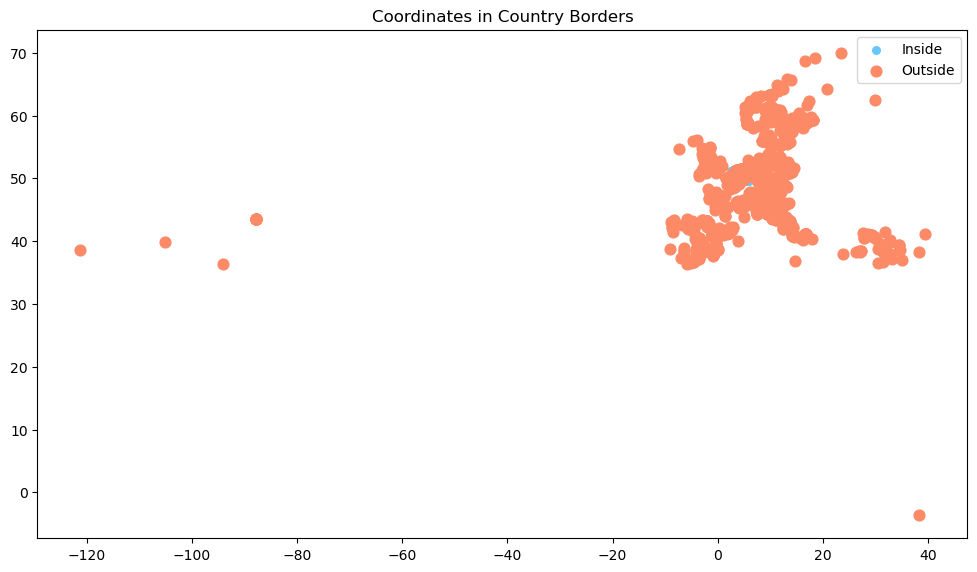

In [59]:
fig, ax = plt.subplots(figsize=(12, 12))
country.plot(ax=ax, color='lightgrey', edgecolor='grey')
points_within.plot(ax=ax, color='#67c8fc', markersize=30, label='Inside')
geo_df[~geo_df.index.isin(points_within.index)].plot(ax=ax, color='#fc8a67', markersize=60, label='Outside')

plt.title("Coordinates in Country Borders")
plt.legend()
plt.show()

<h4>Inspect Rows with Outside Coordinates</h4>

In [60]:
points_outside[['Company Name', 'Latitude', 'Longitude']].drop_duplicates()

,Company Name,Latitude,Longitude
71,IPC Europe - I.P.C. EUROPE,43.499844,-87.844997
243,Kockartz Jérôme,50.695645,6.097178
572,Nele Dhont,51.464625,4.458329
720,Standard Fasel België,51.245967,5.536768
871,Vloerverwarming Oost Limburg,51.150151,5.817631
...,...,...,...
14102,Ypsotec AG (Precision Solutions),47.198549,7.399361
14107,ZAPPETTIFICIO FACCHINI S.R.L.,44.571048,11.884935
14110,Zefitech AG,47.308511,8.223204
14115,Zeisler Metallverarbeitung GmbH & Co. KG,48.599760,13.124102


<h4>Remove Outliers</h4>

In [61]:
B_Original_df.drop(points_outside.index, inplace=True)
B_Original_df.reset_index(drop=True, inplace=True)

<h3>📝 Correct Incorrect Entries</h3>

<h4>Resolve Busines Model</h4>

In [51]:
B_Original_df['Business Model'].unique()

array(['OEM', 'Distributor'], dtype=object)

<h4>Resolve Category</h4>

In [52]:
Categories = np.sort(B_Original_df['Category'].unique())
Categories

array(['Agricultural Machinery', 'Boilers', 'Castings', 'Drives',
       'Electric Machinery', 'Food, Beverage, & Pharmaceutical Machinery',
       'Hardware Metal Products and Products of Other Materials',
       'Hydraulic and Pneumatic Components', 'Industrial Automation',
       'Industrial Furnaces', 'Industrial Turnkey Plant',
       'Internal Combustion Engines', 'Machinery for Processing Plastics',
       'Metal Cutting Tools', 'Mining Machinery', 'Motors',
       'Office Machinery', 'Packaging',
       'Papermaking and Converting Machinery',
       'Printing and Binding Machinery',
       'Pumps, Fans, Compressors, and Vacuum Pumps',
       'Refrigerating Equipment', 'Services', 'Subcontract Service',
       'Tools, Cutters, Moulds, and Dies', 'Weighing Machines',
       'Welding and Cutting Machinery', 'Woodworking Machinery'],
      dtype=object)

<h4>Resolve Subcategory</h4>

In [53]:
B_Original_df['Subcategory'] = B_Original_df['Subcategory'].str.title()

In [54]:
Subcategories = B_Original_df['Subcategory'].unique()
Subcategories

array([nan, 'Abb', 'Rockwell Automation', 'Weg Electric', 'Bonfiglioli',
       'Sew-Eurodrive', 'Nxp Semiconductors', 'Schaeffler'], dtype=object)

In [55]:
B_Original_df['Subcategory'] = None

<h4>Resolve State</h4>

In [56]:
B_Original_df['State'].sort_values().unique().tolist()

['Aksakovo',
 'Aleksandrovo',
 'Alfatar',
 'Antonovo',
 'Apriltsi',
 'Ardino',
 'Asenovgrad',
 'Aytos',
 'Balgarene',
 'Balgarovo',
 'Bankya',
 'Bansko',
 'Banya',
 'Barutin',
 'Batak',
 'Bel Kamen',
 'Belashtitsa',
 'Belene',
 'Belitsa',
 'Belo Pole',
 'Belovo',
 'Belozem',
 'Belyakovets',
 'Benkovski',
 'Blagoevgrad',
 'Boboshevo',
 'Bogdan',
 'Bogutevo',
 'Borima',
 'Borino',
 'Botevgrad',
 'Boykovo',
 'Bozhurishte',
 'Branipole',
 'Bratsigovo',
 'Brestnik',
 'Breznik',
 'Buntsevo',
 'Burgas',
 'Burya',
 'Busmantsi',
 'Byal Bryag',
 'Byal Izvor',
 'Byala',
 'Byala Cherkva',
 'Chakalarovo',
 'Chepelare',
 'Chereshovo',
 'Cherganovo',
 'Cherkovitsa',
 'Chernevo',
 'Cherni Osam',
 'Cherniche',
 'Cherven Bryag',
 'Cheshnegirovo',
 'Chirpan',
 'Chorbadzhiysko',
 'Dabene',
 'Dabnitsa',
 'Dalbok Dol',
 'Devin',
 'Dimitrovgrad',
 'Dobrich',
 'Dobrinishte',
 'Dobroplodno',
 'Dolina',
 'Dolna Oryahovitsa',
 'Dolni Chiflik',
 'Dolni Glavanak',
 'Dolno Kamartsi',
 'Dorkovo',
 'Dospat',
 'Dospey

In [57]:
bulgarian_provinces = {
    'Aksakovo': 'Varna',
    'Aleksandrovo': 'Haskovo',
    'Alfatar': 'Silistra',
    'Antonovo': 'Targovishte',
    'Apriltsi': 'Lovech',
    'Ardino': 'Kardzhali',
    'Asenovgrad': 'Plovdiv',
    'Aytos': 'Burgas',
    'Balgarene': 'Vratsa',
    'Balgarovo': 'Burgas',
    'Bankya': 'Sofia',
    'Bansko': 'Blagoevgrad',
    'Banya': 'Plovdiv',
    'Barutin': 'Pazardzhik',
    'Batak': 'Pazardzhik',
    'Bel Kamen': 'Pernik',
    'Belashtitsa': 'Plovdiv',
    'Belene': 'Pleven',
    'Belitsa': 'Blagoevgrad',
    'Belo Pole': 'Plovdiv',
    'Belovo': 'Pazardzhik',
    'Belozem': 'Plovdiv',
    'Belyakovets': 'Veliko Tarnovo',
    'Benkovski': 'Sliven',
    'Blagoevgrad': 'Blagoevgrad',
    'Boboshevo': 'Kyustendil',
    'Bogdan': 'Razgrad',
    'Bogutevo': 'Vidin',
    'Borima': 'Vidin',
    'Borino': 'Smolyan',
    'Botevgrad': 'Sofia',
    'Boykovo': 'Stara Zagora',
    'Bozhurishte': 'Sofia',
    'Branipole': 'Pazardzhik',
    'Bratsigovo': 'Pazardzhik',
    'Brestnik': 'Plovdiv',
    'Breznik': 'Pernik',
    'Buntsevo': 'Blagoevgrad',
    'Burgas': 'Burgas',
    'Burya': 'Plovdiv',
    'Busmantsi': 'Sofia',
    'Byal Bryag': 'Pleven',
    'Byal Izvor': 'Vratsa',
    'Byala': 'Ruse',
    'Byala Cherkva': 'Veliko Tarnovo',
    'Chakalarovo': 'Burgas',
    'Chepelare': 'Smolyan',
    'Chereshovo': 'Blagoevgrad',
    'Cherganovo': 'Veliko Tarnovo',
    'Cherkovitsa': 'Veliko Tarnovo',
    'Chernevo': 'Burgas',
    'Cherni Osam': 'Lovech',
    'Cherniche': 'Burgas',
    'Chernomorets': 'Burgas',
    'Cherven Bryag': 'Pleven',
    'Cheshnegirovo': 'Plovdiv',
    'Chirpan': 'Stara Zagora',
    'Chorbadzhiysko': 'Sliven',
    'Dabene': 'Sofia',
    'Dabnitsa': 'Blagoevgrad',
    'Dalbok Dol': 'Plovdiv',
    'Devin': 'Smolyan',
    'Dimitrovgrad': 'Haskovo',
    'Dobrich': 'Dobrich',
    'Dobrinishte': 'Blagoevgrad',
    'Dobroplodno': 'Burgas',
    'Dolina': 'Plovdiv',
    'Dolna Oryahovitsa': 'Veliko Tarnovo',
    'Dolni Chiflik': 'Varna',
    'Dolni Glavanak': 'Kardzhali',
    'Dolno Kamartsi': 'Sofia',
    'Dorkovo': 'Pazardzhik',
    'Dospat': 'Smolyan',
    'Dospey': 'Sofia',
    'Dragor': 'Smolyan',
    'Drangovo': 'Silistra',
    'Dryanovo': 'Gabrovo',
    'Dulovo': 'Silistra',
    'Dunavtsi': 'Vidin',
    'Dupnitsa': 'Kyustendil',
    'Dushantsi': 'Kyustendil',
    'Dyadovo': 'Sliven',
    'Dyankovo': 'Shumen',
    'Dzhebel': 'Kardzhali',
    'Elena': 'Veliko Tarnovo',
    'Eleshnitsa': 'Blagoevgrad',
    'Elhovo': 'Yambol',
    'Elin Pelin': 'Sofia',
    'Etropole': 'Sofia',
    'Gabarevo': 'Veliko Tarnovo',
    'Gabene': 'Sofia',
    'Gabrovo': 'Gabrovo',
    'Galabovo': 'Stara Zagora',
    'Garmen': 'Blagoevgrad',
    'Gela': 'Smolyan',
    'General Toshevo': 'Dobrich',
    'German': 'Plovdiv',
    'Gesha': 'Smolyan',
    'Glavinitsa': 'Silistra',
    'Godech': 'Sofia',
    'Golyamo Gradishte': 'Ruse',
    'Gorna Malina': 'Sofia',
    'Gorna Oryahovitsa': 'Veliko Tarnovo',
    'Gorno Draglishte': 'Blagoevgrad',
    'Gorno Kraishte': 'Blagoevgrad',
    'Gorno Sahrane': 'Stara Zagora',
    'Gotse Delchev': 'Blagoevgrad',
    'Govedartsi': 'Sofia',
    'Graf Ignatievo': 'Plovdiv',
    'Grozdyovo': 'Burgas',
    'Gulyantsi': 'Pleven',
    'Gumoshtnik': 'Lovech',
    'Gurkovo': 'Stara Zagora',
    'Hadzhidimovo': 'Blagoevgrad',
    'Harmanli': 'Haskovo',
    'Haskovo': 'Haskovo',
    'Hisarya': 'Plovdiv',
    'Hitrino': 'Shumen',
    'Hlyabovo': 'Yambol',
    'Hrabrino': 'Plovdiv',
    'Hrishteni': 'Gabrovo',
    'Ihtiman': 'Sofia',
    'Isperih': 'Razgrad',
    'Izbeglii': 'Pazardzhik',
    'Kableshkovo': 'Burgas',
    'Kalekovets': 'Plovdiv',
    'Kalipetrovo': 'Pazardzhik',
    'Kaloyanovo': 'Plovdiv',
    'Kamenitsa': 'Blagoevgrad',
    'Kameno': 'Burgas',
    'Kardzhali': 'Kardzhali',
    'Karlovo': 'Plovdiv',
    'Karnobat': 'Burgas',
    'Kaspichan': 'Shumen',
    'Kavarna': 'Dobrich',
    'Kazanlak': 'Stara Zagora',
    'Kichevo': 'Varna',
    'Kirkovo': 'Kardzhali',
    'Kochan': 'Plovdiv',
    'Kokalyane': 'Sofia',
    'Konarsko': 'Plovdiv',
    'Kopilovtsi': 'Sofia',
    'Koprinka': 'Stara Zagora',
    'Koprivets': 'Targovishte',
    'Koprivshtitsa': 'Sofia',
    'Kostandovo': 'Blagoevgrad',
    'Kostenets': 'Sofia',
    'Kostievo': 'Varna',
    'Kostinbrod': 'Sofia',
    'Kran': 'Stara Zagora',
    'Krastava': 'Blagoevgrad',
    'Kresna': 'Blagoevgrad',
    'Krichim': 'Plovdiv',
    'Krumovgrad': 'Kardzhali',
    'Krumovo': 'Plovdiv',
    'Krushevets': 'Silistra',
    'Kubrat': 'Razgrad',
    'Kuklen': 'Plovdiv',
    'Kyustendil': 'Kyustendil',
    'Lesidren': 'Lovech',
    'Levski': 'Pleven',
    'Lom': 'Montana',
    'Lovech': 'Lovech',
    'Lozarevo': 'Burgas',
    'Lukovit': 'Lovech',
    'Lyaskovets': 'Veliko Tarnovo',
    'Lyaskovo': 'Veliko Tarnovo',
    'Lyubimets': 'Haskovo',
    'Lyulyakovo': 'Yambol',
    'Lyutidol': 'Pleven',
    'Malomir': 'Yambol',
    'Marikostinovo': 'Blagoevgrad',
    'Marino Pole': 'Haskovo',
    'Markovo': 'Plovdiv',
    'Medovene': 'Sliven',
    'Merichleri': 'Haskovo',
    'Mesta': 'Blagoevgrad',
    'Mezdra': 'Vratsa',
    'Mitovska': 'Montana',
    'Mitrovtsi': 'Gabrovo',
    'Mogilets': 'Veliko Tarnovo',
    'Momchilgrad': 'Kardzhali',
    'Momchilovtsi': 'Smolyan',
    'Momin Sbor': 'Sofia',
    'Momkovo': 'Blagoevgrad',
    'Montana': 'Montana',
    'Mostich': 'Shumen',
    'Mursalevo': 'Kyustendil',
    'Musomishta': 'Blagoevgrad',
    'Nikopol': 'Pleven',
    'Nova Mahala': 'Vratsa',
    'Novi Iskar': 'Sofia',
    'Novi Pazar': 'Shumen',
    'Novo Panicharevo': 'Blagoevgrad',
    'Opaka': 'Targovishte',
    'Oreshak': 'Lovech',
    'Osina': 'Varna',
    'Ovoshtnik': 'Plovdiv',
    'Panagyurishte': 'Pazardzhik',
    'Panichkovo': 'Yambol',
    'Parvenets': 'Pazardzhik',
    'Parvomay': 'Plovdiv',
    'Parvomaytsi': 'Veliko Tarnovo',
    'Pavlikeni': 'Veliko Tarnovo',
    'Pazardzhik': 'Pazardzhik',
    'Pernik': 'Pernik',
    'Perushtitsa': 'Plovdiv',
    'Peshtera': 'Pazardzhik',
    'Petarch': 'Sofia',
    'Petrich': 'Blagoevgrad',
    'Pirin': 'Blagoevgrad',
    'Plachkovtsi': 'Gabrovo',
    'Pleven': 'Pleven',
    'Plovdiv': 'Plovdiv',
    'Polenitsa': 'Blagoevgrad',
    'Polski Trambesh': 'Veliko Tarnovo',
    'Popovo': 'Targovishte',
    'Popovtsi': 'Gabrovo',
    'Pravets': 'Sofia',
    'Primorsko': 'Burgas',
    'Prisovo': 'Plovdiv',
    'Prolesha': 'Blagoevgrad',
    'Provadiya': 'Varna',
    'Radinovo': 'Plovdiv',
    'Radomir': 'Pernik',
    'Radomirtsi': 'Plovdiv',
    'Raduil': 'Blagoevgrad',
    'Rakitovo': 'Pazardzhik',
    'Razgrad': 'Razgrad',
    'Razlog': 'Blagoevgrad',
    'Ribaritsa': 'Lovech',
    'Ribnovo': 'Blagoevgrad',
    'Rogosh': 'Vidin',
    'Roman': 'Varna',
    'Rozino': 'Plovdiv',
    'Rudnik': 'Plovdiv',
    'Rudozem': 'Smolyan',
    'Rupite': 'Blagoevgrad',
    'Ruse': 'Ruse',
    'Sadovo': 'Plovdiv',
    'Saedinenie': 'Plovdiv',
    'Samokov': 'Sofia',
    'Sandanski': 'Blagoevgrad',
    'Sandrovo': 'Ruse',
    'Sarnitsa': 'Pazardzhik',
    'Satovcha': 'Blagoevgrad',
    'Selishte': 'Kyustendil',
    'Septemvri': 'Pazardzhik',
    'Sestrimo': 'Kyustendil',
    'Sevlievo': 'Gabrovo',
    'Shemshevo': 'Sofia',
    'Shipka': 'Stara Zagora',
    'Shivachevo': 'Sliven',
    'Shumen': 'Shumen',
    'Silistra': 'Silistra',
    'Simitli': 'Blagoevgrad',
    'Sinitovo': 'Plovdiv',
    'Sitovo': 'Silistra',
    'Skravena': 'Sofia',
    'Slivata': 'Plovdiv',
    'Sliven': 'Sliven',
    'Slivnitsa': 'Sofia',
    'Slivo Pole': 'Ruse',
    'Slokoshtitsa': 'Plovdiv',
    'Smirnenski': 'Ruse',
    'Smolyan': 'Smolyan',
    'Sofia': 'Sofia',
    'Sokolovo': 'Burgas',
    'Sopitsa': 'Blagoevgrad',
    'Stamboliyski': 'Plovdiv',
    'Stara Reka': 'Veliko Tarnovo',
    'Stara Zagora': 'Stara Zagora',
    'Starnitsa': 'Blagoevgrad',
    'Startsevo': 'Sofia',
    'Strazhitsa': 'Veliko Tarnovo',
    'Struma': 'Blagoevgrad',
    'Strumeshnitsa': 'Blagoevgrad',
    'Stryama': 'Plovdiv',
    'Suhindol': 'Veliko Tarnovo',
    'Sungurlare': 'Burgas',
    'Svishtov': 'Veliko Tarnovo',
    'Svoge': 'Sofia',
    'Targovishte': 'Targovishte',
    'Tazha': 'Stara Zagora',
    'Teteven': 'Lovech',
    'Ticha': 'Varna',
    'Topoli': 'Varna',
    'Toros': 'Stara Zagora',
    'Tran': 'Pernik',
    'Troyan': 'Lovech',
    'Trud': 'Plovdiv',
    'Tryavna': 'Gabrovo',
    'Tsaratsovo': 'Plovdiv',
    'Tsenovo': 'Ruse',
    'Tushovitsa': 'Pernik',
    'Tutrakan': 'Silistra',
    'Tutrakantsi': 'Silistra',
    'Tvarditsa': 'Sliven',
    'Varna': 'Varna',
    'Varshets': 'Montana',
    'Varvara': 'Burgas',
    'Vedrare': 'Pazardzhik',
    'Veliki Preslav': 'Shumen',
    'Veliko Tarnovo': 'Veliko Tarnovo',
    'Velingrad': 'Pazardzhik',
    'Venets': 'Shumen',
    'Vetovo': 'Ruse',
    'Vidin': 'Vidin',
    'Vievo': 'Sofia',
    'Vladaya': 'Sofia',
    'Voden': 'Plovdiv',
    'Vodno': 'Varna',
    'Voluyak': 'Sofia',
    'Voyvodinovo': 'Plovdiv',
    'Voyvodovo': 'Vratsa',
    'Vratsa': 'Vratsa',
    'Yablanitsa': 'Lovech',
    'Yagodovo': 'Plovdiv',
    'Yakoruda': 'Blagoevgrad',
    'Yambol': 'Yambol',
    'Yavorets': 'Gabrovo',
    'Zabardo': 'Blagoevgrad',
    'Zagoriche': 'Sliven',
    'Zagrazhden': 'Blagoevgrad',
    'Zavet': 'Razgrad',
    'Zhaltusha': 'Lovech',
    'Zhitnitsa': 'Vratsa',
    'Zlataritsa': 'Veliko Tarnovo',
    'Zlatograd': 'Smolyan',
}

In [58]:
towns = B_Original_df['State'].sort_values().unique().tolist()

In [59]:
B_Original_df['State'] = B_Original_df['State'].map(bulgarian_provinces)

In [60]:
B_Original_df['State'] = B_Original_df['State'].where(B_Original_df['State'].notna(), None)

In [61]:
unmapped_towns = B_Original_df[B_Original_df['State'].isna() & B_Original_df['State'].notna()]['State'].unique()

In [62]:
unmapped_towns

array([], dtype=object)

In [63]:
State_mode = B_Original_df['State'].mode()

In [64]:
State_mode

0    Sofia
Name: State, dtype: object

In [65]:
B_Original_df['State'] = B_Original_df['State'].fillna(State_mode)

In [66]:
B_Original_df.head(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Employees
0,OEM,Metal Cutting Tools,None,MACHINE COMMERCE LTD,"11 Kozanovska str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Plovdiv,Bulgaria,+359886399355,+35933163030,NaN,NaN,3109200.0,<NA>
1,OEM,Metal Cutting Tools,None,ZMM - SLIVEN,"16 Bansko Shose str.,Sliven,Bulgaria,8800",42.639093,26.303853,Sliven,Bulgaria,+35944622891,+35944662563,www.zmmsliven.com,office@zmmbulgaria.com,15227800.0,<NA>
2,OEM,Metal Cutting Tools,None,UNITECH-TROYAN,"229 str. GENERAL KARTSOV,Troyan,Bulgaria,5600",42.869076,24.711611,Lovech,Bulgaria,+359885329733,NaN,NaN,NaN,534693.0,<NA>
3,OEM,Metal Cutting Tools,None,FACTORY FOR GRINDING MACHINES,"13 Kozanovska str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Plovdiv,Bulgaria,+35933163797,+35933163788,www.zshm-as.com,zshm@zshm-as.com,<NA>,<NA>
4,OEM,Metal Cutting Tools,None,MACHINES IN THREE DIMENSIONS,"69 Shipchenski Prohod blvd. - Slatina Distr.,S...",42.848278,23.268520,Sofia,Bulgaria,+35928700142,+35924626316,www.m3d.bg,office@m3d.bg,225103.0,<NA>


<h4>Resolve Country</h4>

In [67]:
B_Original_df['Country'].unique()

array(['Bulgaria'], dtype=object)

<h4>Resolve Annual Sales</h4>

In [68]:
Annual_Sales_mean = round(B_Original_df['Annual Sales'].mean())

In [69]:
B_Original_df['Annual Sales'] = B_Original_df['Annual Sales'].fillna(Annual_Sales_mean)

<h4>Resolve Employees</h4>

In [70]:
Employees_mean = round(B_Original_df['Employees'].mean())

In [71]:
B_Original_df['Employees'] = B_Original_df['Employees'].fillna(Employees_mean)

<h3>📈 Detect and Treat Outliers</h3>

In [72]:
plt.style.use('fivethirtyeight')

<h4>Check Latitude</h4>

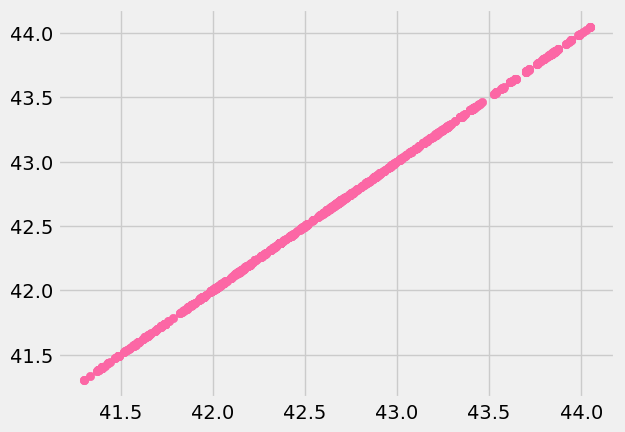

In [73]:
plt.scatter(B_Original_df['Latitude'], B_Original_df['Latitude'], color='#fc67a5')
plt.show()

<h4>Check Longitude</h4>

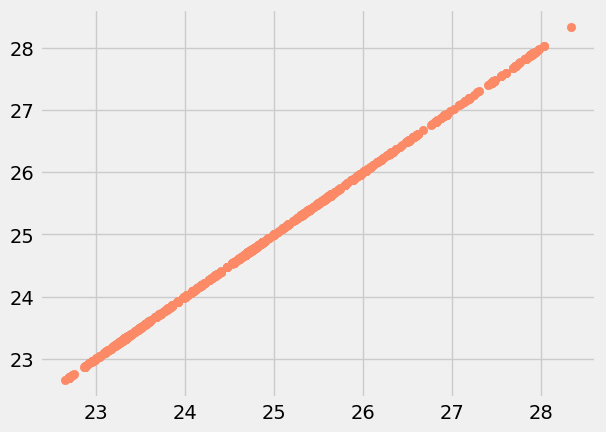

In [74]:
plt.scatter(B_Original_df['Longitude'], B_Original_df['Longitude'], color='#fc8a67')
plt.show()

<h4>Check Annual Sales</h4>

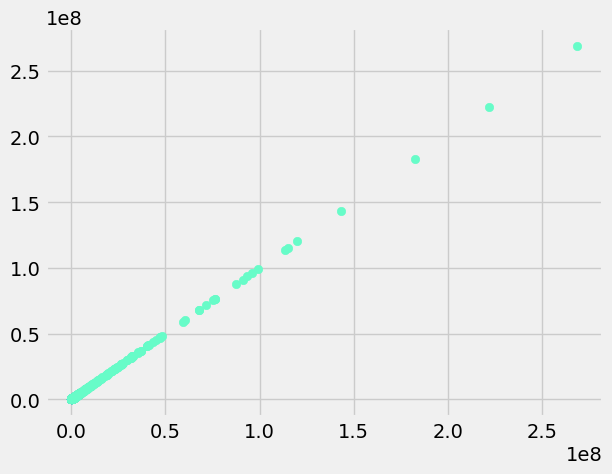

In [75]:
plt.scatter(B_Original_df['Annual Sales'], B_Original_df['Annual Sales'], color='#67fcc8')
plt.show()

<h4>Check Employees</h4>

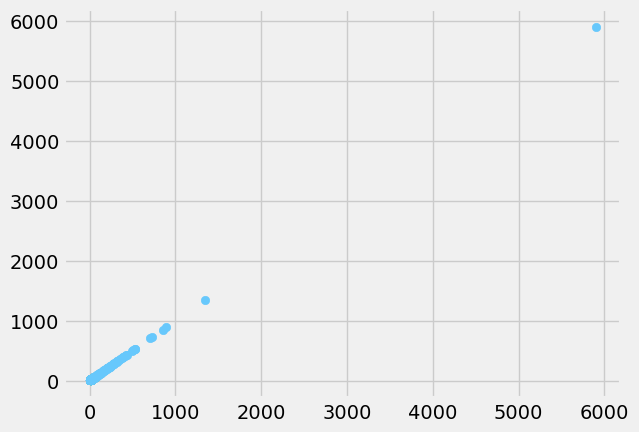

In [76]:
plt.scatter(B_Original_df['Employees'], B_Original_df['Employees'], color='#67c8fc')
plt.show()

So far, there are <b>no outliers</b> in the dataset.

<h2>🔎 Finalize Dataset</h2>

<h3>Check Data Types</h3>

In [77]:
B_Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Business Model  1825 non-null   object 
 1   Category        1825 non-null   object 
 2   Subcategory     0 non-null      object 
 3   Company Name    1825 non-null   object 
 4   Address         1825 non-null   object 
 5   Latitude        1825 non-null   float64
 6   Longitude       1825 non-null   float64
 7   State           1825 non-null   object 
 8   Country         1825 non-null   object 
 9   Contact No.     1749 non-null   object 
 10  Fax No.         298 non-null    object 
 11  Website         425 non-null    object 
 12  Email           311 non-null    object 
 13  Annual Sales    1825 non-null   Float64
 14  Employees       1825 non-null   Int64  
dtypes: Float64(1), Int64(1), float64(2), object(11)
memory usage: 217.6+ KB


<h3>Check For Null Values</h3>

In [78]:
B_Original_df.isnull().any()

Business Model    False
Category          False
Subcategory        True
Company Name      False
Address           False
Latitude          False
Longitude         False
State             False
Country           False
Contact No.        True
Fax No.            True
Website            True
Email              True
Annual Sales      False
Employees         False
dtype: bool

<h3>Summarize Dataset</h3>

In [79]:
B_Original_df.describe()

,Latitude,Longitude,Annual Sales,Employees
count,1825.000000,1825.000000,1825.0,1825.0
mean,42.563700,24.850494,4482886.994307,61.813151
std,0.592816,1.303232,13577992.672681,151.345039
min,41.298746,22.649147,14.0,1.0
25%,42.132795,23.723550,531221.0,32.0
50%,42.610241,24.721584,1646485.68,62.0
75%,42.929890,25.609068,4482887.0,62.0
max,44.045960,28.339007,268755500.0,5900.0


<h3>Check Random Samples</h3>

In [80]:
B_Original_df.sample(5)

,Business Model,Category,Subcategory,Company Name,Address,Latitude,Longitude,State,Country,Contact No.,Fax No.,Website,Email,Annual Sales,Employees
919,OEM,Woodworking Machinery,None,ITALENERGY LTD,Pzrupchovets Darvodelski Tseh Na Et Zhivko Kar...,42.365284,24.675297,Blagoevgrad,Bulgaria,+359888236870,NaN,NaN,NaN,465252.0,62
349,OEM,Packaging,None,RELE 74,"13 Rabotnicheska,Sliven,Bulgaria,8800",42.683183,26.306699,Sliven,Bulgaria,+359877660925,NaN,NaN,NaN,862800.0,62
1159,OEM,Industrial Turnkey Plant,None,GREEN STRANDZHA,"1 Stopanski Dvor str./blvd.,Aleksandrovo,Bulga...",42.323390,26.881510,Haskovo,Bulgaria,+359888457524,NaN,NaN,NaN,85065.0,15
703,OEM,Woodworking Machinery,None,SUZANA SHIKIROVA-DZHEVAT SHIKIROV,",Satovcha,Bulgaria,2950",41.619066,23.976042,Blagoevgrad,Bulgaria,+359888554974,NaN,NaN,NaN,4482887.0,62
1681,OEM,Packaging,None,Zdravo Commerce - AS,"60 ALEKSANDAR II str.,Asenovgrad,Bulgaria,4230",42.016030,24.877286,Plovdiv,Bulgaria,+359899863228,NaN,NaN,NaN,723919.0,62


<h2>📥 Download Dataset</h2>

In [22]:
B_Original_df.to_csv('datasets\output\Dataset_Belgium_cleaned.csv', index=False)

In [40]:
styled_df.to_csv('datasets\output\Dataset_Belgium_duplicates.csv', index=False)

AttributeError: 'Styler' object has no attribute 'to_csv'

<h2>💌 Credits ✉️</h2>

This project is done by <b>ERMITANO, Kate Justine</b> as a part of the internship tasks under the instructions of <b>Miss Fherlyn Charl Yet</b>.